In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read DAT CSV

In [6]:
df = pd.read_csv(r'/Users/morty/Downloads/HCV/HCV.csv')

In [7]:
print(df)

           matchid  groupid  subgroup          ra        dec  pipeline_class  \
0              352  1040910        26  269.790894 -29.248819               1   
1              352  1040910        26  269.790894 -29.248819               1   
2              352  1040910        26  269.790894 -29.248819               1   
3              352  1040910        26  269.790894 -29.248819               1   
4              352  1040910        26  269.790894 -29.248819               1   
...            ...      ...       ...         ...        ...             ...   
2576369  108169792  1063416        12  269.609375 -29.169004               2   
2576370  108169792  1063416        12  269.609375 -29.169004               2   
2576371  108169792  1063416        12  269.609375 -29.169004               2   
2576372  108169792  1063416        12  269.609375 -29.169004               2   
2576373  108169792  1063416        12  269.609375 -29.169004               2   

         expert_class      filter  num_

## Exploring This Bad Boy

In [8]:
#drop all o fhte duplicate matchids, keep the first one, then drop every row that has a filter without WFC in the 
#front

dropped1 = df.drop_duplicates('matchid', keep='first')

contains = dropped1[dropped1['filter'].str.contains('WFC')]
contains

,matchid,groupid,subgroup,ra,dec,pipeline_class,expert_class,filter,num_filters,var_quality_flag,...,lightcurve_d,lightcurve_m,lightcurve_cm,lightcurve_e,lightcurve_i,lightcurve_r,ci_d,ci_v,d_d,d_v
51,857,1047823,3,269.759521,-29.325701,2,0,WFC3_F606W,2,AAAAA,...,55855.067306,22.442699,22.440860,0.0123,hst_12586_04_wfc3_uvis_f606w,False,55855.067306,1.111818,55855.067306,2.031857
633,5233,1063416,1,269.684570,-29.108875,1,0,WFC3_F606W,2,CACCB,...,56333.029591,20.992800,20.997755,0.0056,hst_13057_01_wfc3_uvis_f606w,False,56333.029591,1.020795,56333.029591,2.220572
655,8836,1061725,2,269.908020,-29.246920,1,0,WFC3_F606W,2,AAACC,...,56121.340112,20.846300,20.841094,0.0049,hst_12586_38_wfc3_uvis_f606w,False,56121.340112,1.070227,56121.340112,10.067249
734,12670,33470,-5,138.018784,-64.868912,1,0,WFC3_F275W,3,AABAC,...,56543.728460,23.140699,23.138623,0.0693,hst_12605_12_wfc3_uvis_f275w,False,56543.728460,0.967529,56543.728460,14.410995
750,13935,1024360,0,267.232666,-20.373484,1,0,WFC3_F606W,2,AAAAB,...,55051.868277,24.084101,24.083845,0.0399,hst_11685_02_wfc3_uvis_f606w,False,55051.868277,0.967159,55051.868277,3.689872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575750,108159410,12611,16,201.703262,-47.496502,2,0,WFC3_F225W,9,NaN,...,55027.232085,24.787600,24.769671,0.1790,hst_11452_02_wfc3_uvis_f225w,False,55027.232085,0.986588,55027.232085,2.320704
2576015,108161971,12611,19,201.678543,-47.482300,1,0,WFC3_F225W,9,AAAAC,...,55027.232085,23.839399,23.840407,0.0780,hst_11452_02_wfc3_uvis_f225w,False,55027.232085,0.968823,55027.232085,8.155849
2576202,108164917,1063416,7,269.683533,-29.130518,2,0,WFC3_F606W,2,AAAAB,...,55859.058822,23.598101,23.613366,0.0282,hst_12586_05_wfc3_uvis_f606w,False,55859.058822,1.031136,55859.058822,10.135417
2576243,108166460,12611,21,201.657333,-47.475353,1,0,WFC3_F275W,4,AAAAC,...,55027.321159,20.780100,20.783469,0.0090,hst_11452_02_wfc3_uvis_f275w,False,55027.321159,0.894118,55027.321159,4.538578


In [9]:
#Drop all columns that aren't filters and then each duplicate filter and then list out all of the 
#filters we have to deal with

filters = df.drop_duplicates('filter', keep='first')
filters['filter']

0          ACS_F606W
22         ACS_F814W
51        WFC3_F606W
75        WFC3_F814W
99         ACS_F435W
144       WFC3_F105W
158       WFC3_F125W
164       WFC3_F140W
170       WFC3_F160W
272      WFPC2_F555W
279      WFPC2_F814W
646        ACS_F658N
734       WFC3_F275W
739       WFC3_F336W
744       WFC3_F438W
849        ACS_F475W
903       WFC3_F555W
960       WFC3_F656N
1246       ACS_F775W
1263      ACS_F850LP
1434       ACS_F550M
1440       ACS_F555W
1480       ACS_F625W
1654      WFC3_F467M
1730      WFC3_F775W
1742     WFC3_F850LP
1823       ACS_F502N
1876       ACS_F660N
1932      WFC3_F502N
2836     WFC3_F350LP
4339     WFPC2_F300W
4344     WFPC2_F450W
4349     WFPC2_F606W
4393      WFC3_F110W
6131      WFC3_F390W
7933     WFC3_F600LP
8067      WFC3_F225W
9822      WFC3_F153M
11763     WFC3_F475W
17956     WFC3_F139M
20313     WFC3_F658N
20985    WFPC2_F675W
48556    WFPC2_F336W
63820    WFPC2_F439W
63828    WFPC2_F502N
63839    WFPC2_F656N
72008     WFC3_F098M
Name: filter,

In [10]:
x_lower = 21
x_higher = 23

mag_22 = df[df['hcv_mean_mag'].between(x_lower, x_higher)]

mag_22

,matchid,groupid,subgroup,ra,dec,pipeline_class,expert_class,filter,num_filters,var_quality_flag,...,lightcurve_d,lightcurve_m,lightcurve_cm,lightcurve_e,lightcurve_i,lightcurve_r,ci_d,ci_v,d_d,d_v
51,857,1047823,3,269.759521,-29.325701,2,0,WFC3_F606W,2,AAAAA,...,55855.067306,22.442699,22.440860,0.0123,hst_12586_04_wfc3_uvis_f606w,False,55855.067306,1.111818,55855.067306,2.031857
52,857,1047823,3,269.759521,-29.325701,2,0,WFC3_F606W,2,AAAAA,...,56109.767311,22.323799,22.321921,0.0180,hst_12586_36_wfc3_uvis_f606w,False,56109.767311,1.247159,56109.767311,11.337379
53,857,1047823,3,269.759521,-29.325701,2,0,WFC3_F606W,2,AAAAA,...,56121.473087,22.482599,22.483223,0.0121,hst_12586_40_wfc3_uvis_f606w,False,56121.473087,1.069091,56121.473087,3.625824
54,857,1047823,3,269.759521,-29.325701,2,0,WFC3_F606W,2,AAAAA,...,56137.296305,22.514200,22.516962,0.0121,hst_12586_44_wfc3_uvis_f606w,False,56137.296305,1.063182,56137.296305,11.860729
55,857,1047823,3,269.759521,-29.325701,2,0,WFC3_F606W,2,AAAAA,...,56156.853620,22.450600,22.454403,0.0120,hst_12586_48_wfc3_uvis_f606w,False,56156.853620,1.129886,56156.853620,2.439925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576354,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F606W,2,CAABC,...,56385.008023,21.008101,21.016613,0.0057,hst_13057_16_wfc3_uvis_f606w,False,56385.008023,1.360000,56385.008023,0.126100
2576355,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F606W,2,CAABC,...,56452.866856,20.993299,20.997228,0.0071,hst_13057_32_wfc3_uvis_f606w,False,56452.866856,1.299205,56452.866856,0.543381
2576356,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F606W,2,CAABC,...,56697.278271,21.066900,21.074746,0.0064,hst_13463_04_wfc3_uvis_f606w,False,56697.278271,1.130341,56697.278271,5.923583
2576357,108169792,1063416,12,269.609375,-29.169004,2,0,WFC3_F606W,2,CAABC,...,56764.939707,21.086800,21.088663,0.0064,hst_13463_20_wfc3_uvis_f606w,False,56764.939707,1.361364,56764.939707,4.001287


## Plots to find most popular filters used

2576374


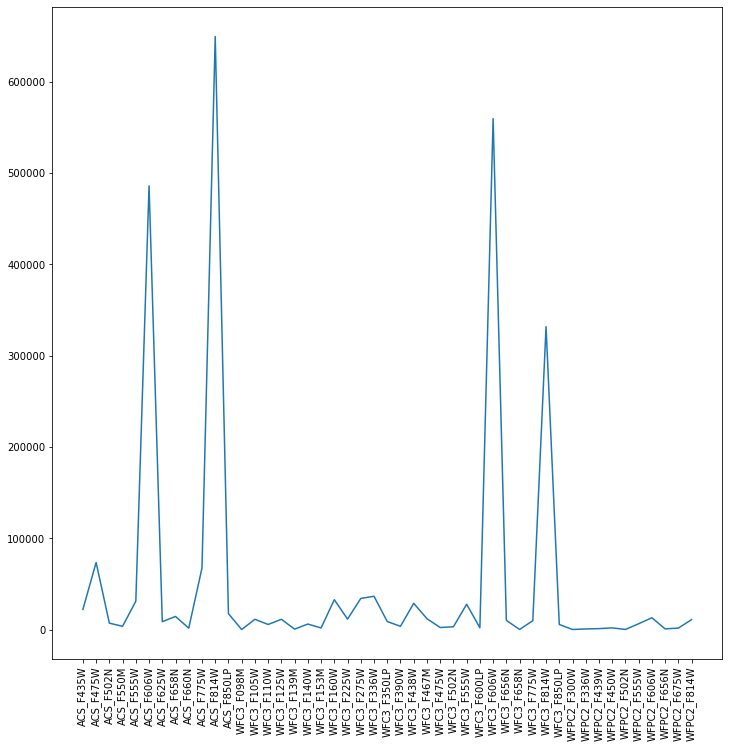

In [11]:
plt.figure(figsize = (12,12))

df['count'] = 1

count = pd.DataFrame(df.groupby(['filter']).count()['count'])

count_sum = count['count'].sum()

print(count_sum)

plt.plot(count)
plt.xticks(rotation ='vertical')
plt.show()

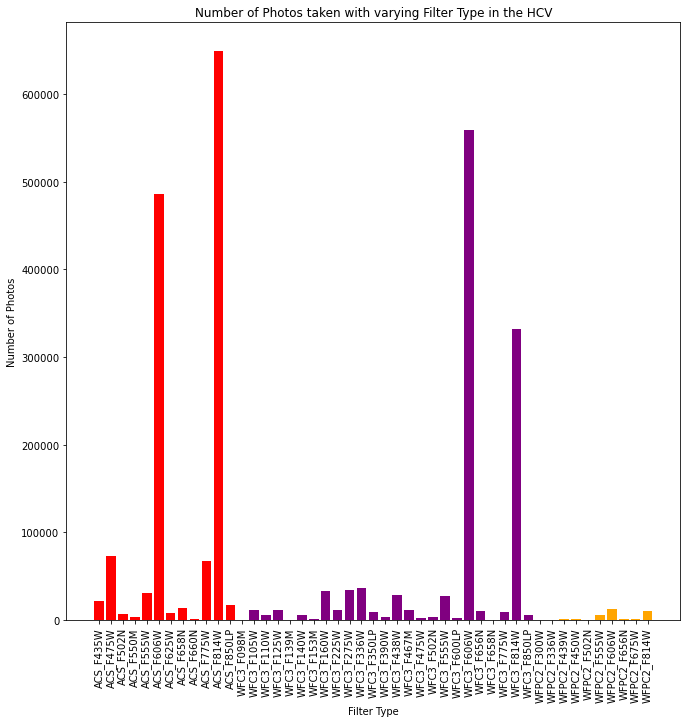

In [12]:
plt.figure(figsize = (11,11))

#need to reset the index so that filter and count are separate columns
count_reset = count.reset_index()

filter_list = [x for x in count_reset['filter']]

#create a list of colors which print out red, purple, or orange given ACS, WFC3 or something else is in the
#filter list value
colors = []
for value in range(len(filter_list)):
    if ('ACS') in filter_list[value]:
        colors.append('red')
    elif ('WFC3') in filter_list[value]:
        colors.append('purple')
    else:
        colors.append('orange')

plt.bar(count_reset['filter'], count_reset['count'], color = colors)
plt.xticks(rotation = 'vertical')
plt.xlabel('Filter Type')
plt.ylabel('Number of Photos')
plt.title('Number of Photos taken with varying Filter Type in the HCV')
#plt.savefig('filters_and_variables.jpeg')
plt.show()

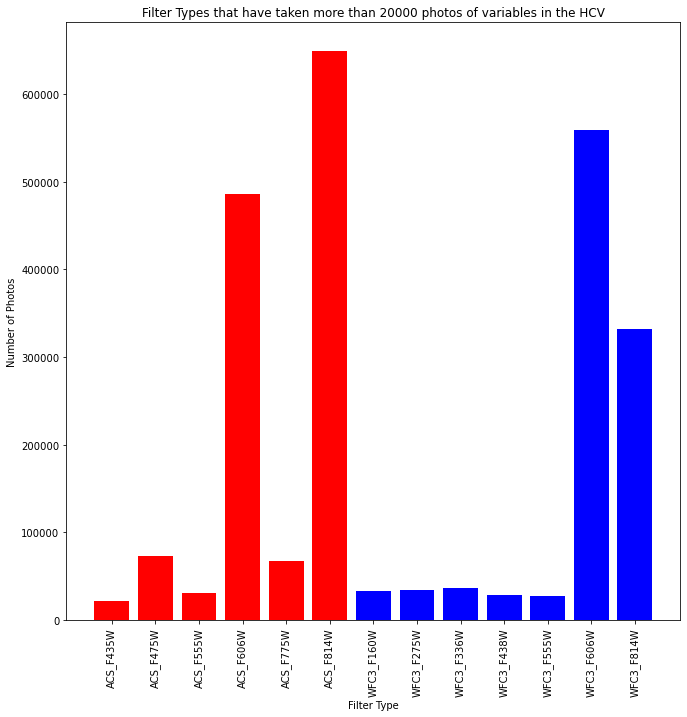

In [13]:
count_reset_drop = count_reset[count_reset['count'] >= 20000]

plt.figure(figsize = (11,11))

filter_list = [x for x in count_reset_drop['filter']]

colors = []
for value in range(len(filter_list)):
    if ('ACS') in filter_list[value]:
        colors.append('red')
    elif ('WFC3') in filter_list[value]:
        colors.append('blue')

#Graph of all the most common filter types with more than 20000 photos of variables taken

plt.bar(count_reset_drop['filter'], count_reset_drop['count'], color = colors)
plt.xticks(rotation = 'vertical')
plt.xlabel('Filter Type')
plt.ylabel('Number of Photos')
plt.title('Filter Types that have taken more than 20000 photos of variables in the HCV')
#plt.savefig('filters_and_variables_20k.jpeg')
plt.show()

## MAD Distribution

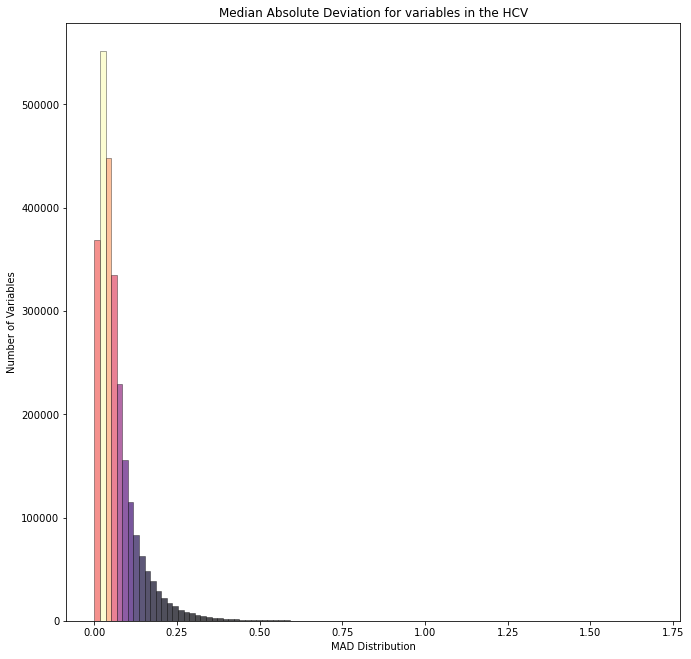

In [14]:
plt.figure(figsize = (11,11))

n, bins, patches = plt.hist(df['mad'], bins= 100, ec='black', lw=0.5, alpha=0.7)
n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.magma(n[i]/max(n)))
    
plt.title("Median Absolute Deviation for variables in the HCV")
plt.xlabel("MAD Distribution")
plt.ylabel("Number of Variables")
#plt.savefig("MAD_Distribution_HCV.jpeg")
plt.show()

### Lightcurve Corrected Magnitude Distribution

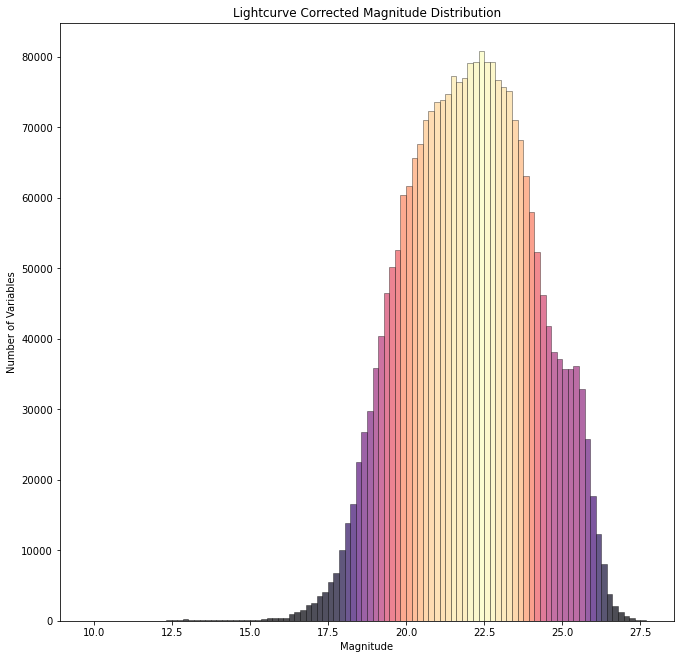

In [15]:
plt.figure(figsize = (11,11))

n, bins, patches = plt.hist(df['lightcurve_cm'], bins= 100, ec='black', lw=0.5, alpha=0.7)
n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.magma(n[i]/max(n)))
    
plt.title("Lightcurve Corrected Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Number of Variables")
#plt.savefig("Lightcurve_CM_Distribution_HCV.jpeg")
plt.show()

### Chi2 Distribution

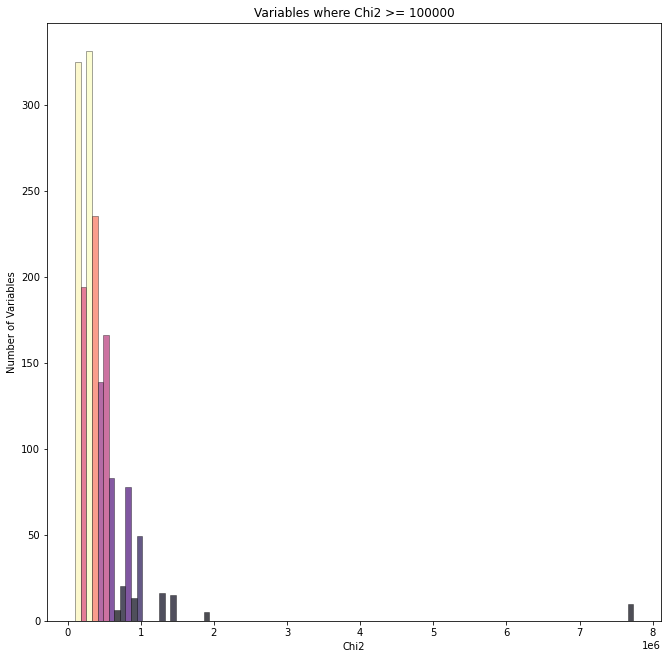

In [16]:
plt.figure(figsize = (11,11))

df_chi2_drop = df[df['chi2'] >= 100000] 

n, bins, patches = plt.hist(df_chi2_drop['chi2'], bins= 100, ec='black', lw=0.5, alpha=0.7)
n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.magma(n[i]/max(n)))
    
plt.title("Variables where Chi2 >= 100000")
plt.xlabel("Chi2")
plt.ylabel("Number of Variables")
#plt.savefig("chi2_greaterthan_100000.jpeg")
plt.show()

### Originally a for loop and then turned into a function, allows us to parse through our big data frame and create a new dataframe that compares the largest and smallest magnitudes and their associated time values per matchid to find delta magnitude and delta time

In [17]:
#Function that when a filter is inputed into it, gathers all of the like matchids,
#compares their magnitudes and overall time to find the deltas
def get_filter_df(filter_df):
    mag_list = []
    time_list = []
    count = 0
    delta_mag_data = {'matchid': [], 'delta_mag': [], 'delta_t': [], 'count': [], 'delta_t_total': []}
    delta_mag_df = pd.DataFrame(delta_mag_data)
    for i in range(len(filter_df) - 1): #len is -1 since updated is i+1, so we'll have it looping through until it
        #gets to the end of our specific filter list
        current_id = filter_df['matchid'][i] #current matchid
        updated_id = filter_df['matchid'][i+1] #next matchid

        if current_id == updated_id: #if current = updated, append the magnitude to mag_list
            mag_list.append(filter_df['lightcurve_cm'][i])
            time_list.append(filter_df['lightcurve_d'][i])
            count += 1

        else: #if current != updated then find the min and max of the list, the delta magnitude and add it to the
            #dataframe
            mag_list.append(filter_df['lightcurve_cm'][i]) #append the last matching value
            time_list.append(filter_df['lightcurve_d'][i])
            count += 1

            #zip together magnitude and time
            mag_time = list(zip(mag_list, time_list))

            #sort the list
            mag_time_sorted = sorted(mag_time)

            #The max magnitude in our list is the first value in our list, remember magnitude max and min is opposite
            max_mag = mag_time_sorted[0][0]
            #The min magnitude is our last value in our sorted list
            min_mag = mag_time_sorted[-1][0]
            #Subtract the two values
            delta_mag = max_mag-min_mag

            #if Nan, just change to 0
            if pd.isna(delta_mag):
                delta_mag = 0

            #Same thing for time, once sorted our max and min becomes clear
            max_t = mag_time_sorted[-1][1]
            min_t = mag_time_sorted[0][1]
            delta_t = max_t-min_t

            #if Nan, just change to 0
            if pd.isna(delta_t):
                delta_t = 0
            
            total_max_t = max(time_list)
            total_min_t = min(time_list)
            delta_t_total = total_max_t-total_min_t

            #We then append our delta mag and delta t to our original empty dataframe with these columns already set
            delta_mag_df = delta_mag_df.append({'matchid': current_id, 'delta_mag': delta_mag, 'delta_t': delta_t, 'count': count, 'delta_t_total': delta_t_total}, ignore_index = True)
            #reset the lists to go again
            mag_list = []
            time_list = []
            count = 0
        #return original dataframe    
    return delta_mag_df
    
#All four interesting filter types
filter_type_list = ['WFC3_F606W', 'WFC3_F814W', 'ACS_F606W', 'ACS_F814W']
filter_df_list = []

#for each type in our list
for f in filter_type_list:
    #find all of the filters that are equal to f
    filter_df = df.loc[df['filter'] == f]
    filter_df_reset = filter_df.reset_index()
    #append all of the filters' dataframes to a list
    filter_df_list.append(get_filter_df(filter_df_reset))

#the first index of this list is the first dataframe WFC3_F606W, kind of wacky
wfc3814 = filter_df_list[1]

### Limit Number of Match IDs

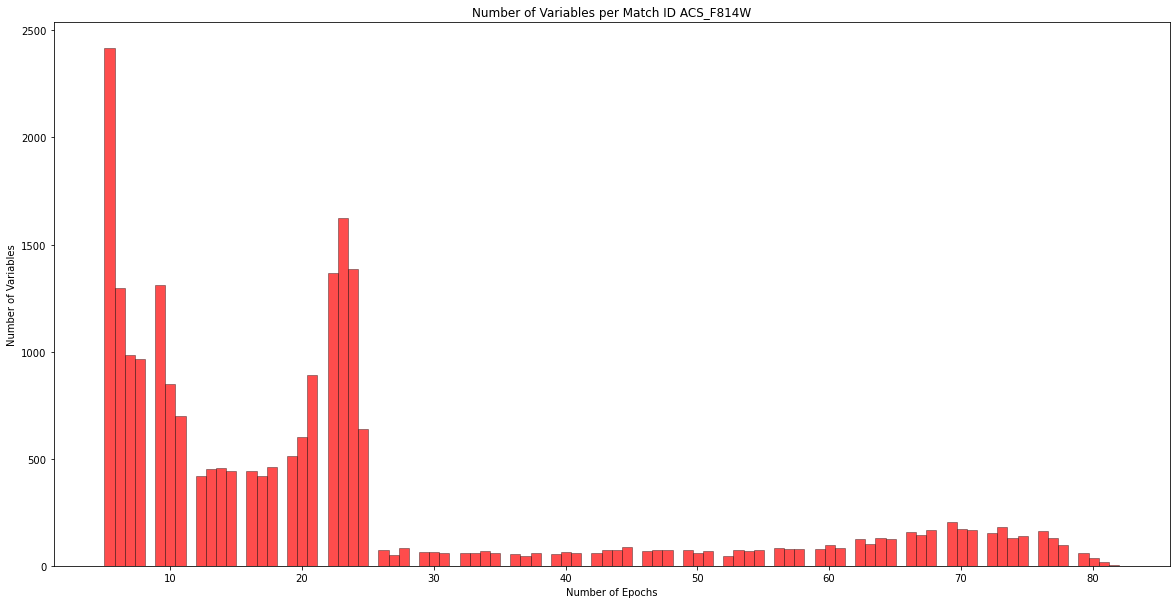

In [18]:
matchid_15 = filter_df_list[1].loc[filter_df_list[1]['count'] <= 15] #limited number of matchids

plt.figure(figsize = (20,10))

#plotting the delta magnitude and time histograms next to each other
plt.hist(filter_df_list[0]['count'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Number of Variables')
plt.title('Number of Variables per Match ID ACS_F814W')

#plt.savefig("epochs_matchid_ACS_F814W.jpeg")

plt.show()

### WCF3_F606W Plots:

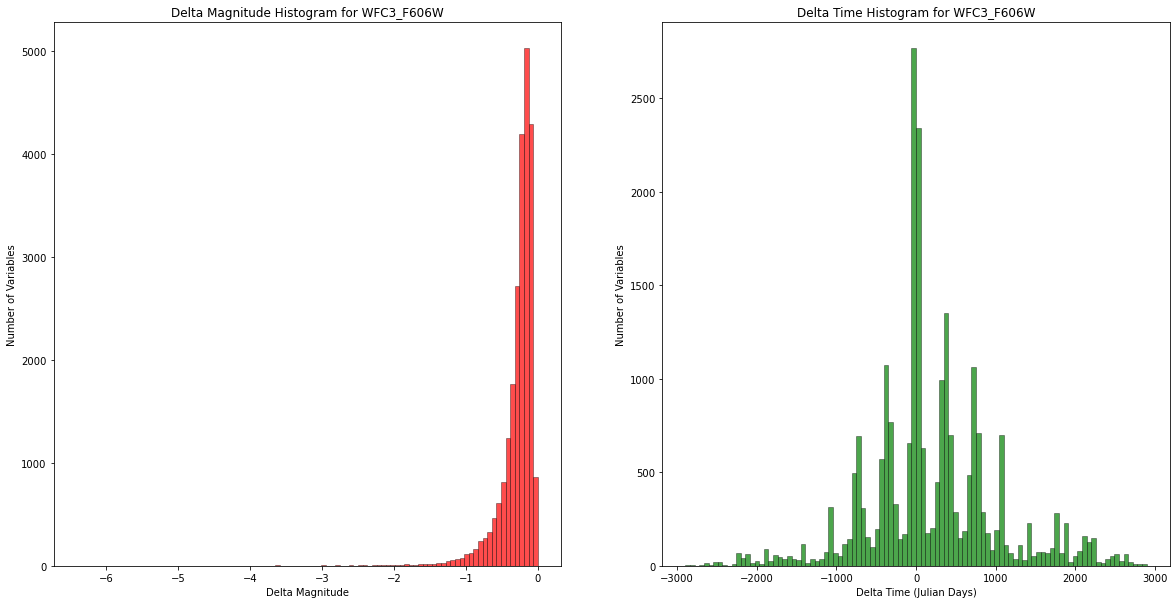

In [19]:
#plotting the delta magnitude and time histograms next to each other
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list[0]['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for WFC3_F606W')
ax[1].hist(filter_df_list[0]['delta_t'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Delta Time Histogram for WFC3_F606W')


#plt.savefig("delta_mag_time_histogram.jpeg")

plt.show()

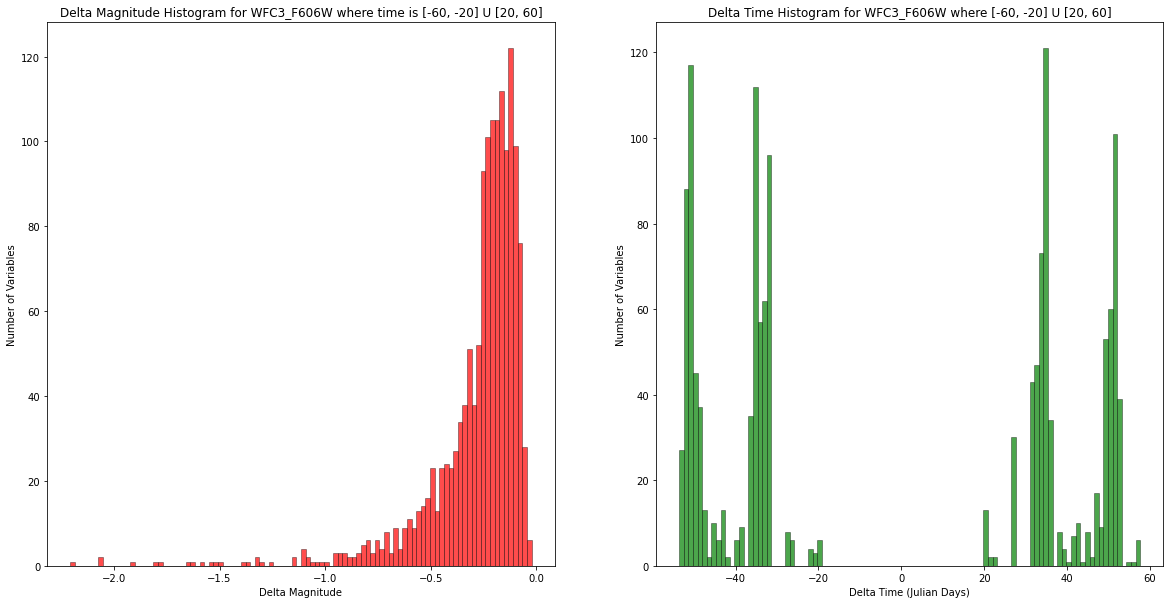

In [20]:
#Now looking at the delta magnitude and delta time of these objects when delta time is -60 days < x < 60 days
filter_df_list_drop = filter_df_list[0][(filter_df_list[0]['delta_t'] <= 60) & (filter_df_list[0]['delta_t'] >= 20) | (filter_df_list[0]['delta_t'] >= -60) & (filter_df_list[0]['delta_t'] <= -20)]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list_drop['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for WFC3_F606W where time is [-60, -20] U [20, 60]')
ax[1].hist(filter_df_list_drop['delta_t'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Delta Time Histogram for WFC3_F606W where [-60, -20] U [20, 60]')

#plt.savefig("delta_mag_time_histogram_between_60&20.jpeg")

plt.show()

### WCF3_F814W:

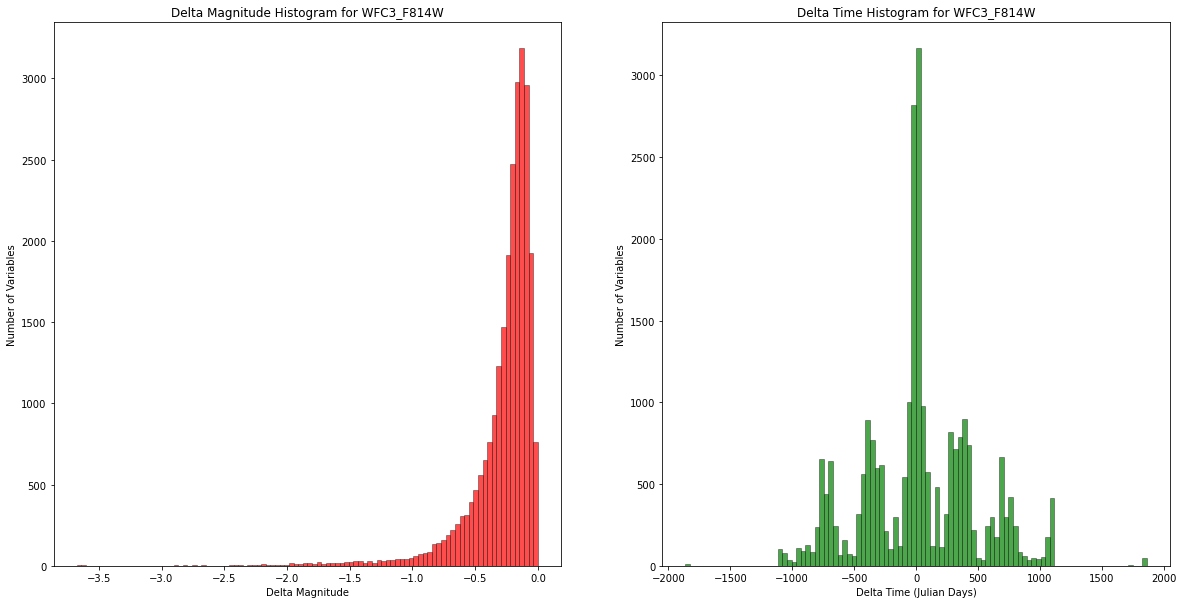

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list[1]['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for WFC3_F814W')
ax[1].hist(filter_df_list[1]['delta_t'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Delta Time Histogram for WFC3_F814W')


#plt.savefig("delta_mag_time_histogram_814W.jpeg")

plt.show()

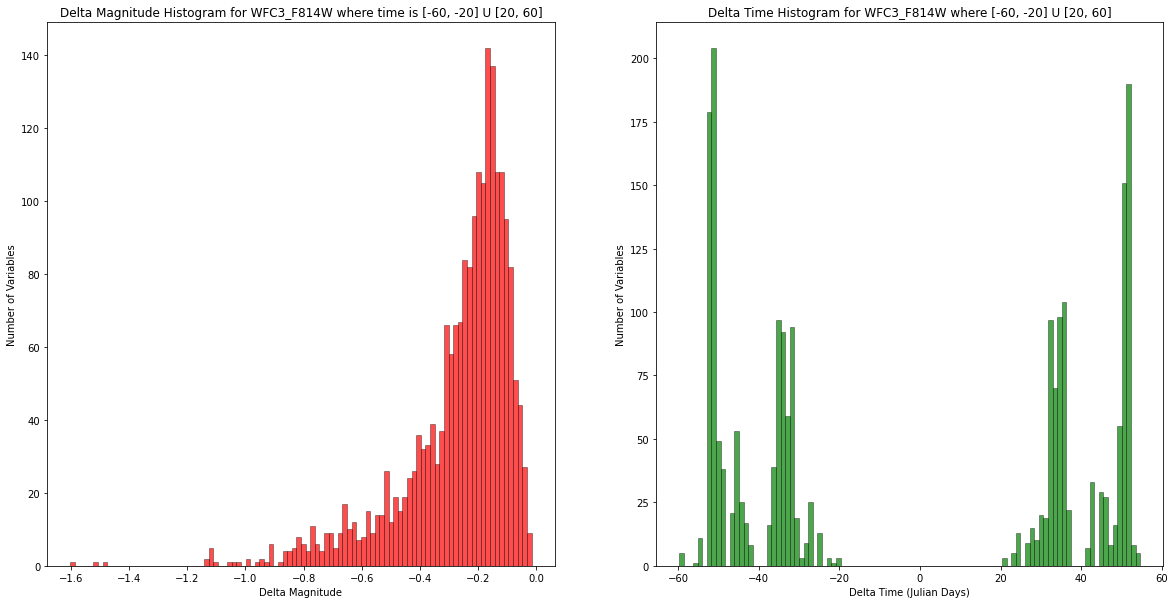

In [22]:
#Now looking at the delta magnitude and delta time of these objects when delta time is -60 days < x < 60 days
filter_df_list_drop = filter_df_list[1][(filter_df_list[1]['delta_t'] <= 60) & (filter_df_list[1]['delta_t'] >= 20) | (filter_df_list[1]['delta_t'] >= -60) & (filter_df_list[1]['delta_t'] <= -20)]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list_drop['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for WFC3_F814W where time is [-60, -20] U [20, 60]')
ax[1].hist(filter_df_list_drop['delta_t'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Delta Time Histogram for WFC3_F814W where [-60, -20] U [20, 60]')

#plt.savefig("delta_mag_time_histogram_between_60&20_814W.jpeg")

plt.show()

### ACS_F606W:

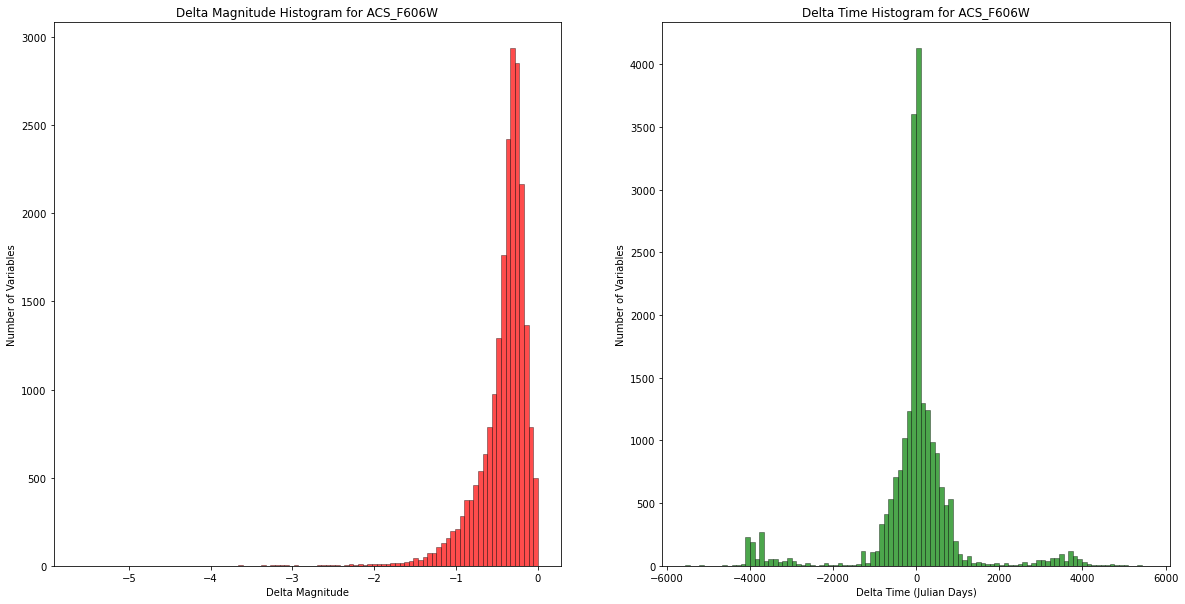

In [23]:
#plotting the delta magnitude and time histograms next to each other
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list[2]['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for ACS_F606W')
ax[1].hist(filter_df_list[2]['delta_t'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Delta Time Histogram for ACS_F606W')


#plt.savefig("delta_mag_time_histogram_ACSF606W.jpeg")

plt.show()

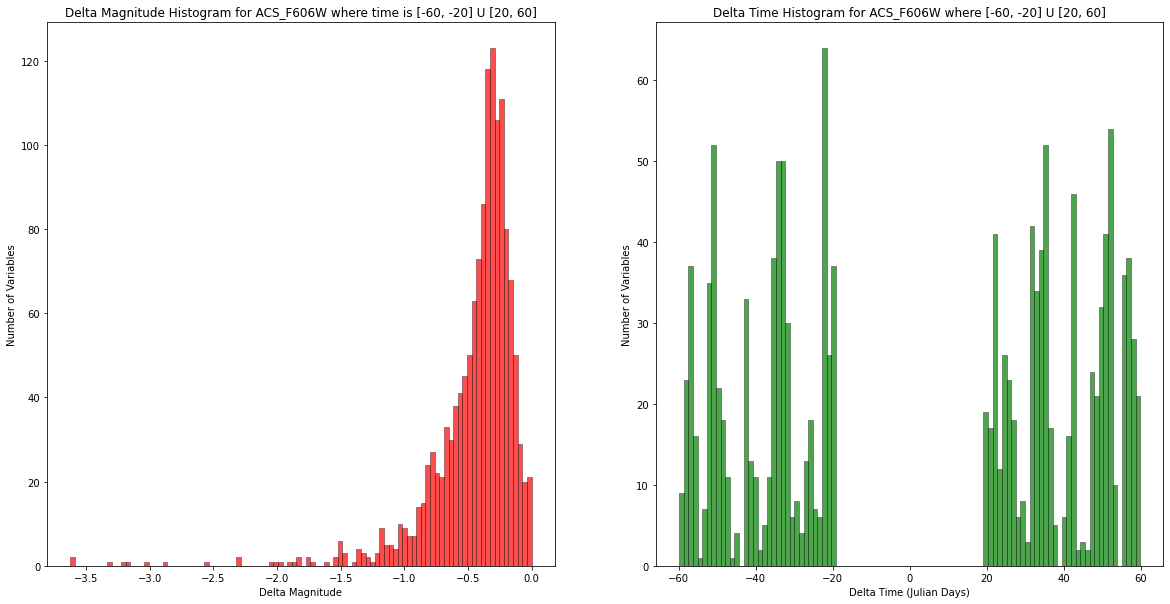

In [24]:
#Now looking at the delta magnitude and delta time of these objects when delta time is -60 days < x < 60 days
filter_df_list_drop = filter_df_list[2][(filter_df_list[2]['delta_t'] <= 60) & (filter_df_list[2]['delta_t'] >= 20) | (filter_df_list[2]['delta_t'] >= -60) & (filter_df_list[2]['delta_t'] <= -20)]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list_drop['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for ACS_F606W where time is [-60, -20] U [20, 60]')
ax[1].hist(filter_df_list_drop['delta_t'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Delta Time Histogram for ACS_F606W where [-60, -20] U [20, 60]')

#plt.savefig("delta_mag_time_histogram_between_60&20_ACS606W.jpeg")

plt.show()

### ACS_F814W:

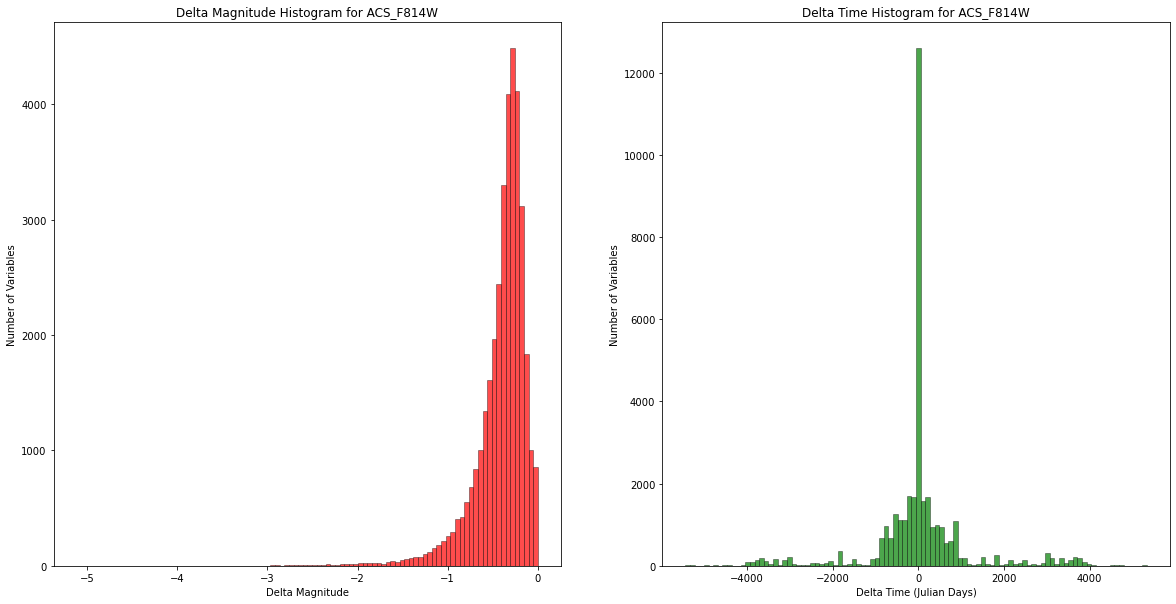

In [25]:
#plotting the delta magnitude and time histograms next to each other
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list[3]['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for ACS_F814W')
ax[1].hist(filter_df_list[3]['delta_t'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Delta Time Histogram for ACS_F814W')


#plt.savefig("delta_mag_time_histogram_ACSF814W.jpeg")

plt.show()

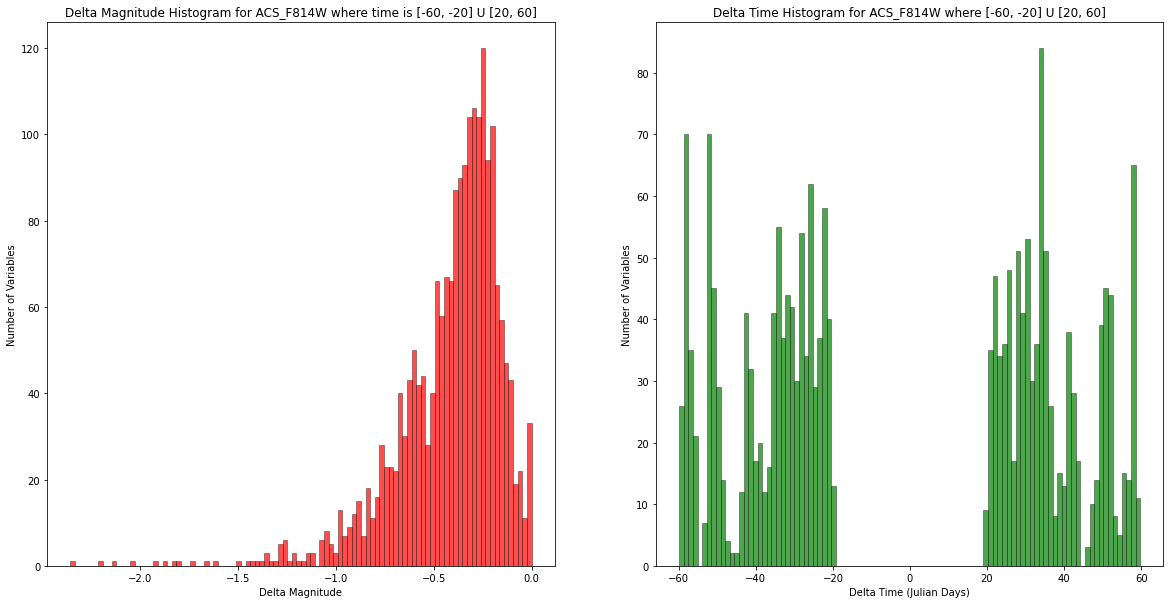

In [26]:
#Now looking at the delta magnitude and delta time of these objects when delta time is -60 days < x < 60 days
filter_df_list_drop = filter_df_list[3][(filter_df_list[3]['delta_t'] <= 60) & (filter_df_list[3]['delta_t'] >= 20) | (filter_df_list[3]['delta_t'] >= -60) & (filter_df_list[3]['delta_t'] <= -20)]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list_drop['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for ACS_F814W where time is [-60, -20] U [20, 60]')
ax[1].hist(filter_df_list_drop['delta_t'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Delta Time Histogram for ACS_F814W where [-60, -20] U [20, 60]')

#plt.savefig("delta_mag_time_histogram_between_60&20_ACS814W.jpeg")

plt.show()

### Planck Function

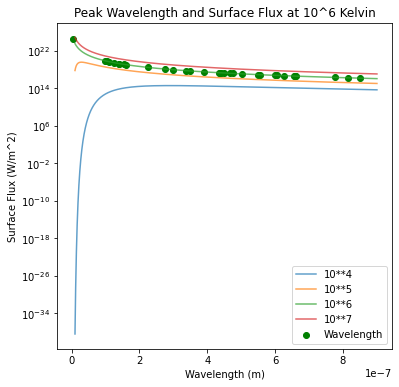

2.9e-09
409566883995768.0


In [27]:
plt.figure(figsize = (6,6))

def planck(l, t):
    #define constants
    h = 6.62607015 * 10**(-34)
    c = 299792458
    k = 1.380649 * 10**(-23)
    
    numerator = (2*h*c**2)/(l**5)
    denominator = np.e**((h*c)/(l*k*t))-1
    
    return numerator/denominator

def wien(t):
    return (2.9*10**(-3))/t

#We want to plot the Planck function where temperature = 10^6

l = np.linspace(10**(-8), 9*10**(-7), 1000000)
plt.plot(l, planck(l, 10**4), alpha = 0.7, label = '10**4')
plt.plot(l, planck(l, 10**5), alpha = 0.7, label = '10**5')
plt.plot(l, planck(l, 10**6), alpha = 0.7, label = '10**6')
plt.plot(l, planck(l, 10**7), alpha = 0.7, label = '10**7')
plt.yscale('log')
plt.xlabel('Wavelength (m)')
plt.ylabel('Surface Flux (W/m^2)')
plt.title('Peak Wavelength and Surface Flux at 10^6 Kelvin')

t = 10**6
#list of all our wavelengths that we want to scatter across our Planck function
wavelength_list = [wien(t), 6.06*10**(-7), 8.14*10**(-7), 4.35*10**(-7), 1.05*10**(-7), 1.25*10**(-7), 
         1.4*10**(-7), 1.6*10**(-7), 5.55*10**(-7), 6.58*10**(-7), 2.75*10**(-7), 3.36*10**(-7), 
         4.38*10**(-7), 4.75*10**(-7), 6.56*10**(-7), 7.75*10**(-7), 8.5*10**(-7), 5.5*10**(-7), 6.25*10**(-7),
         4.67*10**(-7), 5.02*10**(-7), 6.6*10**(-7), 3.5*10**(-7), 3*10**(-7), 4.5*10**(-7), 1.1*10**(-7),
         3.9*10**(-7), 6*10**(-7), 2.25*10**(-7), 1.53*10**(-7), 1.39*10**(-7), 4.39*10**(-7), 0.98*10**(-7)]
wavelength_list.sort()

#x value is na array of all the wavelengths
x = np.array([wavelength_list])
#y is originally an empty list where each value in our wavelength_list gets plugged into the Planck function
y = []
for value in wavelength_list:
    y.append(planck(value, t))

plt.scatter(x,y, color = 'green', label = 'Wavelength')
plt.legend()

#plt.savefig('Planck_Function_3BB.jpeg')

plt.show()

print(wien(10**6))
print(planck(wien(10**4), 10**4)-6*10**(-7))

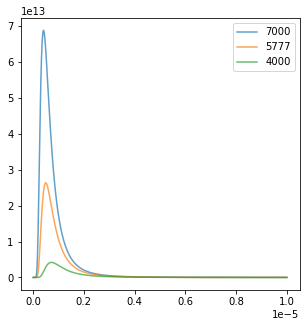

In [28]:
plt.figure(figsize = (5,5))

l = np.linspace(10**(-8), 10*10**(-6), 1000000)

plt.plot(l, planck(l, 7000), alpha = 0.7, label = '7000')
plt.plot(l, planck(l, 5777), alpha = 0.7, label = '5777')
plt.plot(l, planck(l, 4000), alpha = 0.7, label = '4000')

plt.legend()
plt.show()

### Absolute Value Time Graphs

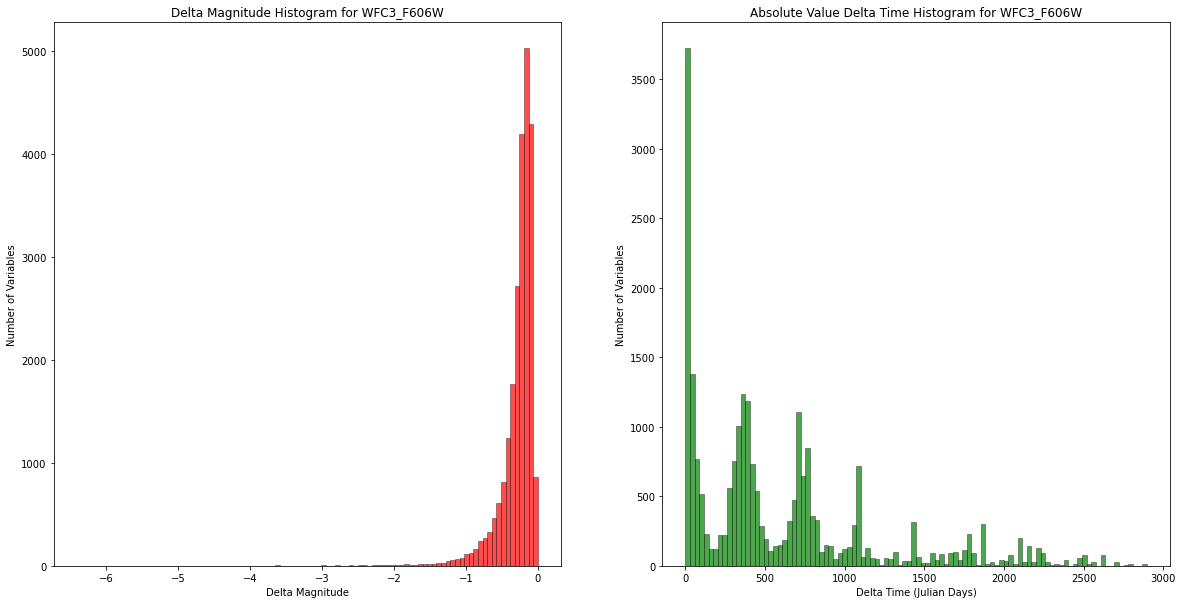

In [29]:
#plotting the delta magnitude and time histograms next to each other
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list[0]['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for WFC3_F606W')
ax[1].hist(filter_df_list[0]['delta_t'].abs(), bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Absolute Value Delta Time Histogram for WFC3_F606W')


#plt.savefig("delta_mag_time_histogram_abs.jpeg")

plt.show()

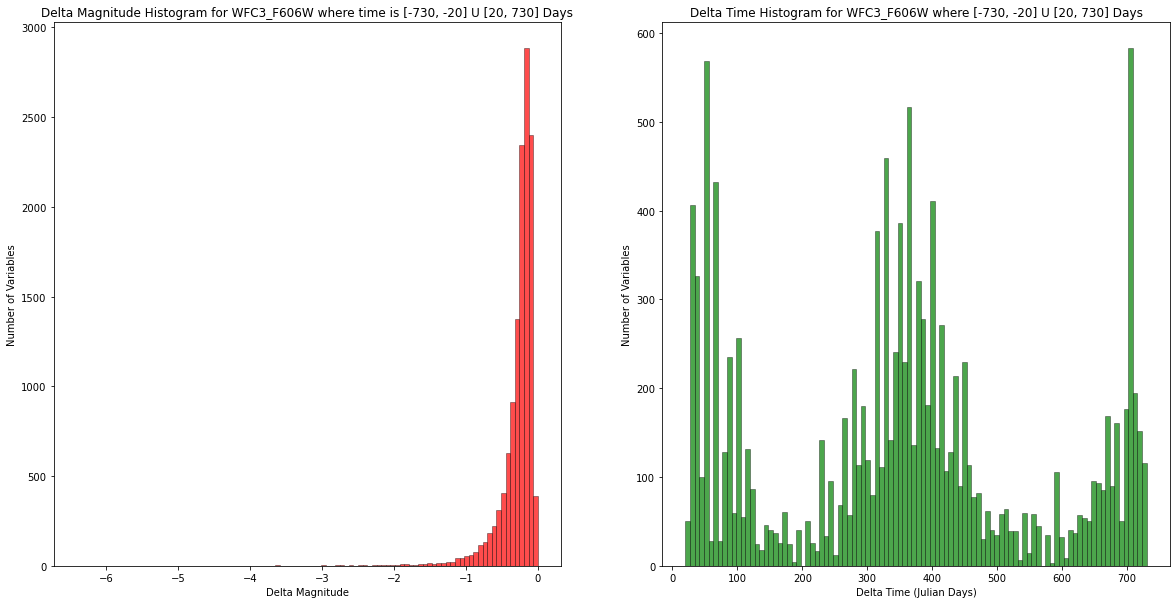

In [30]:
#Now looking at the delta magnitude and delta time of these objects when delta time is -60 days < x < 60 days
filter_df_list_drop = filter_df_list[0][(filter_df_list[0]['delta_t'] <= 730) & (filter_df_list[0]['delta_t'] >= 20) | (filter_df_list[0]['delta_t'] >= -730) & (filter_df_list[0]['delta_t'] <= -20)]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
ax[0].hist(filter_df_list_drop['delta_mag'], bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'red')
ax[0].set_xlabel('Delta Magnitude')
ax[0].set_ylabel('Number of Variables')
ax[0].set_title('Delta Magnitude Histogram for WFC3_F606W where time is [-730, -20] U [20, 730] Days')
ax[1].hist(filter_df_list_drop['delta_t'].abs(), bins = 100, ec = 'black', lw = 0.5, alpha = 0.7, color = 'green')
ax[1].set_xlabel('Delta Time (Julian Days)')
ax[1].set_ylabel('Number of Variables')
ax[1].set_title('Delta Time Histogram for WFC3_F606W where [-730, -20] U [20, 730] Days')

#plt.savefig("delta_mag_time_histogram_Absolute_Value_606W.jpeg")

plt.show()

### TDE Curve

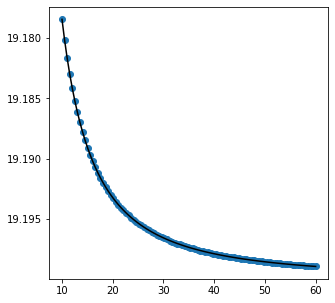

In [31]:
plt.figure(figsize = (5,5))
def tde_curve(t):
    return -t**(-5/3)+19.2

t = np.linspace(10,60,100)
plt.scatter(t, tde_curve(t))
plt.plot(t, tde_curve(t), color = 'black')
plt.gca().invert_yaxis()

### Unique matchids per groupid

In [32]:
def match_group (df):
    
    groupid_list = []
    groupid_data = {'groupid': [], 'num_matchids per groupid': [], 'groupids': []}
    groupid_df = pd.DataFrame(groupid_data)
    
    for i in range(len(df) - 1):
        current_groupid = df['groupid'][i]
        updated_groupid = df['groupid'][i+1]
        
        current_matchid = df['matchid'][i]
        updated_matchid = df['matchid'][i+1]
        
        #if consecutive groupids are equal and the current_matchid and updated_matchid aren't then we also
        #append the current_matchid. This helps us in our search for a different matchid per same groupid
        if (current_groupid == updated_groupid) & (current_matchid != updated_matchid):
            groupid_list.append(current_groupid)
                    
        #if consecutive groupids don't much, we add the last matchid to the list and keep iterating
        elif (current_groupid != updated_groupid):
            groupid_list.append(current_groupid)
                        
            groupid_df = groupid_df.append({'groupid': current_groupid, 'num_matchids per groupid': len(groupid_list), 'groupids': groupid_list}, ignore_index = True)
            
            groupid_list = []

    return groupid_df
            
groupdf = match_group(df)


<Figure size 576x576 with 0 Axes>

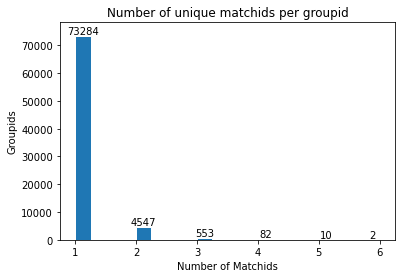

array([1040910., 1047823., 1040153.,   25044.,  521507., 1063416.,
         33688., 1061725., 1045904., 1056946.,   33470., 1024360.,
       1037453., 1039945.,   33584., 1048097., 1062949.,   56019.,
        439774., 1072340.,   12611., 1041481.,   56487., 1084534.,
         24452., 1053852., 1064398., 1083372., 1076197., 1033498.,
         33701., 1013227.,   69810., 1043384., 1033573., 1084480.,
         38905.,   33610., 1017300.,   73455., 1037445., 1064674.,
         22844.,   33004.,  353029., 1046062., 1080307.,   33109.,
         63563.,   25292., 1054696.,  360365.,  483765.,   72495.,
        289829.,   62353., 1044880., 1033762., 1037524.,   47524.,
         25262., 1062832., 1042143., 1012451., 1053537.,   22917.,
         88697.,   66514., 1084533., 1063351.,   92609., 1045103.,
       1027220., 1051244.,   33079., 1037352., 1052878., 1042781.,
       1041148.,  381893.,   65764., 1071126., 1030110., 1043761.,
         17120.,  381717., 1061394.,  538286., 1042675., 10649

In [33]:
plt.figure(figsize = (8,8))

fig, ax = plt.subplots()


arr = ax.hist(groupdf['num_matchids per groupid'], ec='white', bins=20)

labels = [arr[0][i] for i in range(len(arr[0]))]

ax.set_ylim(0, max(labels) + 5000)

rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    if label != 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            height + 0.01,
            int(label),
            ha='center',
            va='bottom'
    )

plt.ylabel('Groupids')
plt.xlabel('Number of Matchids')
plt.title('Number of unique matchids per groupid')
plt.savefig('unique_matchids_per_groupid.jpeg')

plt.show()

groupdf.groupid.unique()

In [34]:
def get_matchids_groupid(groupid):
    groupid_df = df.loc[df.groupid==groupid]
    
    unique_matchids = groupid_df.matchid.unique()
    num_unique_matchids = len(unique_matchids)
    
    return {'groupid': groupid, 'num unique matchids': num_unique_matchids}

groupids = df.groupid.unique()

groupid_data = {'groupid': [], 'num unique matchids': []}
groupid_df = pd.DataFrame(groupid_data)

for groupid in groupids:
    groupid_df = groupid_df.append(get_matchids_groupid(groupid), ignore_index = True)
    
#groupid_df.to_csv('groupid_df.csv')

<Figure size 720x720 with 0 Axes>

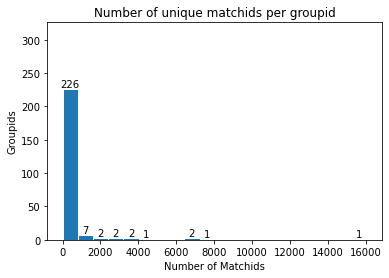

In [35]:
plt.figure(figsize = (10,10))

fig, ax = plt.subplots()


arr = ax.hist(groupid_df['num unique matchids'], ec='white', bins=20)

labels = [arr[0][i] for i in range(len(arr[0]))]

ax.set_ylim(0, max(labels) + 100)

rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    if label != 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            height + 0.01,
            int(label),
            ha='center',
            va='bottom'
    )

plt.ylabel('Groupids')
plt.xlabel('Number of Matchids')
plt.title('Number of unique matchids per groupid')
plt.savefig('unique_matchids_per_groupid.jpeg')

plt.show()